In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as splt
from datetime import datetime
# Load the Drive helper and mount
from google.colab import drive
import zipfile
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


In [ ]:

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

!ls drive/MyDrive/Capstone/Dataset

01_doc.txt	      03_plugs_matlab.zip   06_doc.txt
01_occupancy_csv.zip  03_sm_csv.zip	    06_plugs_csv.zip
01_plugs_csv.zip      03_sm_matlab.zip	    06_plugs_matlab.zip
01_plugs_matlab.zip   04_doc.txt	    06_sm_csv.zip
01_sm_csv.zip	      04_occupancy_csv.zip  06_sm_matlab.zip
01_sm_matlab.zip      04_plugs_csv.zip	    cleaned_data
02_doc.txt	      04_plugs_matlab.zip   cleaned_data_1m
02_occupancy_csv.zip  04_sm_csv.zip	    cleaned_data_1m.csv
02_plugs_csv.zip      04_sm_matlab.zip	    cleaned_data.csv
02_plugs_matlab.zip   05_doc.txt	    plug_oc_cleaned.csv
02_sm_csv.zip	      05_occupancy_csv.zip  public_holiday.csv
02_sm_matlab.zip      05_plugs_csv.zip	    READ_ME_FIRST.txt
03_doc.txt	      05_plugs_matlab.zip   sm_oc_cleaned.csv
03_occupancy_csv.zip  05_sm_csv.zip
03_plugs_csv.zip      05_sm_matlab.zip


In [ ]:
df = pd.read_csv('drive/MyDrive/Capstone/Dataset/cleaned_data_1m.csv')

In [ ]:
tmp=df.iloc[:,:19]
#tmp.to_csv('drive/MyDrive/Capstone/Dataset/sm_oc_cleaned.csv')

In [ ]:
df.columns

Index(['Datetime', 'p_total', 'p_phase1', 'p_phase2', 'p_phase3', 'i_neutral',
       'i_phase1', 'i_phase2', 'i_phase3', 'v_phase1', 'v_phase2', 'v_phase3',
       'psbv12', 'psbv31', 'psbi1', 'psbi2', 'psbi3', 'household',
       'occ_tablet', 'app_01', 'app_02', 'app_03', 'app_04', 'app_05',
       'app_06', 'app_07', 'app_08', 'app_09', 'app_10', 'app_11', 'app_12'],
      dtype='object')

In [ ]:
col=['Datetime','household','occ_tablet', 'app_01', 'app_02', 'app_03', 'app_04', 'app_05',
       'app_06', 'app_07', 'app_08', 'app_09', 'app_10', 'app_11', 'app_12']

In [ ]:
tmp2=df.loc[:,col]
#tmp2.to_csv("drive/MyDrive/Capstone/Dataset/plug_oc_cleaned.csv")

In [ ]:
#tmp2[tmp2.household==1]
#app01 value above 20 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_01']=tmp2[tmp2.household==1]['app_01'].apply(lambda x: 1 if x >= 20 else 0)
#app02 value above 400 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_02']=tmp2[tmp2.household==1]['app_02'].apply(lambda x: 1 if x >= 400 else 0)
#app03 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_03']=tmp2[tmp2.household==1]['app_03'].apply(lambda x: 1 if x > 0 else 0)
#app04 value above 400 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_04']=tmp2[tmp2.household==1]['app_04'].apply(lambda x: 1 if x >= 400 else 0)
#app05 value above 50 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_05']=tmp2[tmp2.household==1]['app_05'].apply(lambda x: 1 if x >= 50 else 0)
#app06 value above 25 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_06']=tmp2[tmp2.household==1]['app_06'].apply(lambda x: 1 if x >= 25 else 0)
#app07 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_07']=tmp2[tmp2.household==1]['app_07'].apply(lambda x: 1 if x >= 10 else 0)
#rest of the appliance are not that much used
#app08 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_08']=tmp2[tmp2.household==1]['app_08'].apply(lambda x: 1 if x > 0 else 0)
#app09 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_09']=tmp2[tmp2.household==1]['app_09'].apply(lambda x: 1 if x > 0 else 0)
#app10 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_10']=tmp2[tmp2.household==1]['app_10'].apply(lambda x: 1 if x > 0 else 0)
#app11 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_11']=tmp2[tmp2.household==1]['app_11'].apply(lambda x: 1 if x > 0 else 0)
#app12 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==1].index,'app_12']=tmp2[tmp2.household==1]['app_12'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
#tmp2[tmp2.household==2]

#app01 value above 1 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_01']=tmp2[tmp2.household==2]['app_01'].apply(lambda x: 1 if x >= 1 else 0)

#app02 value above 128 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_02']=tmp2[tmp2.household==2]['app_02'].apply(lambda x: 1 if x >= 128 else 0)

#app03 value above 25 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_03']=tmp2[tmp2.household==2]['app_03'].apply(lambda x: 1 if x >= 25 else 0)

#app04 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_04']=tmp2[tmp2.household==2]['app_04'].apply(lambda x: 1 if x > 0 else 0)

#app05 value above 75 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_05']=tmp2[tmp2.household==2]['app_05'].apply(lambda x: 1 if x >= 75 else 0)

#app06 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_06']=tmp2[tmp2.household==2]['app_06'].apply(lambda x: 1 if x > 0 else 0)

#app07 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_07']=tmp2[tmp2.household==2]['app_07'].apply(lambda x: 1 if x >= 10 else 0)

#app08 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_08']=tmp2[tmp2.household==2]['app_08'].apply(lambda x: 1 if x >= 10 else 0)

#app09 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_09']=tmp2[tmp2.household==2]['app_09'].apply(lambda x: 1 if x >= 10 else 0)

#app10 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_10']=tmp2[tmp2.household==2]['app_10'].apply(lambda x: 1 if x > 0 else 0)

#app11 value above 50 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_11']=tmp2[tmp2.household==2]['app_11'].apply(lambda x: 1 if x >= 50 else 0)

#app012 value above 25 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==2].index,'app_12']=tmp2[tmp2.household==2]['app_12'].apply(lambda x: 1 if x >= 25 else 0)


In [ ]:
#tmp2[tmp2.household==3]
#app01 value above 1 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_01']=tmp2[tmp2.household==3]['app_01'].apply(lambda x: 1 if x >= 1 else 0)

#app02 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_02']=tmp2[tmp2.household==3]['app_02'].apply(lambda x: 1 if x > 0 else 0)

#app03 value above 5 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_03']=tmp2[tmp2.household==3]['app_03'].apply(lambda x: 1 if x >= 5 else 0)

#app04 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_04']=tmp2[tmp2.household==3]['app_04'].apply(lambda x: 1 if x >= 10 else 0)

#app05 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_05']=tmp2[tmp2.household==3]['app_05'].apply(lambda x: 1 if x > 0 else 0)

#app06 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_06']=tmp2[tmp2.household==3]['app_06'].apply(lambda x: 1 if x >= 10 else 0)

#app07 value above 5 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_07']=tmp2[tmp2.household==3]['app_07'].apply(lambda x: 1 if x >= 5 else 0)

#rest of the appliance are not that much used
#app08 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_08']=tmp2[tmp2.household==3]['app_08'].apply(lambda x: 1 if x > 0 else 0)

#app09 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_09']=tmp2[tmp2.household==3]['app_09'].apply(lambda x: 1 if x > 0 else 0)

#app10 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_10']=tmp2[tmp2.household==3]['app_10'].apply(lambda x: 1 if x > 0 else 0)

#app11 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_11']=tmp2[tmp2.household==3]['app_11'].apply(lambda x: 1 if x > 0 else 0)

#app012 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==3].index,'app_12']=tmp2[tmp2.household==3]['app_12'].apply(lambda x: 1 if x > 0 else 0)



In [ ]:
#tmp2[tmp2.household==4]
#app01 value above 00 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_01']=tmp2[tmp2.household==4]['app_01'].apply(lambda x: 1 if x > 0 else 0)

#app02 value above 50 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_02']=tmp2[tmp2.household==4]['app_02'].apply(lambda x: 1 if x >= 50 else 0)

#app03 value above 50 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_03']=tmp2[tmp2.household==4]['app_03'].apply(lambda x: 1 if x >= 50 else 0)

#app04 value above 30 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_04']=tmp2[tmp2.household==4]['app_04'].apply(lambda x: 1 if x >= 30 else 0)

#app05 value above 00 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_05']=tmp2[tmp2.household==4]['app_05'].apply(lambda x: 1 if x > 0 else 0)

#app06 value above 1 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_06']=tmp2[tmp2.household==4]['app_06'].apply(lambda x: 1 if x >= 1 else 0)

#app07 value above 50 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_07']=tmp2[tmp2.household==4]['app_07'].apply(lambda x: 1 if x >= 50 else 0)

#app08 value above 300 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_08']=tmp2[tmp2.household==4]['app_08'].apply(lambda x: 1 if x >= 300 else 0)

#rest of the appliance are not that much used
#app09 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_09']=tmp2[tmp2.household==4]['app_09'].apply(lambda x: 1 if x > 0 else 0)

#app10 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_10']=tmp2[tmp2.household==4]['app_10'].apply(lambda x: 1 if x > 0 else 0)

#app11 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_11']=tmp2[tmp2.household==4]['app_11'].apply(lambda x: 1 if x > 0 else 0)

#app012 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==4].index,'app_12']=tmp2[tmp2.household==4]['app_12'].apply(lambda x: 1 if x > 0 else 0)



In [ ]:
#tmp2[tmp2.household==5]
#app01 value above 1 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_01']=tmp2[tmp2.household==5]['app_01'].apply(lambda x: 1 if x >= 1 else 0)

#app02 value above 100 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_02']=tmp2[tmp2.household==5]['app_02'].apply(lambda x: 1 if x >=100 else 0)

#app03 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_03']=tmp2[tmp2.household==5]['app_03'].apply(lambda x: 1 if x >= 10 else 0)

#app04 value above 300 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_04']=tmp2[tmp2.household==5]['app_04'].apply(lambda x: 1 if x >= 300 else 0)

#app05 value above 00 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_05']=tmp2[tmp2.household==5]['app_05'].apply(lambda x: 1 if x > 0 else 0)

#app06 value above 30 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_06']=tmp2[tmp2.household==5]['app_06'].apply(lambda x: 1 if x >= 30 else 0)

#app07 value above 50 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_07']=tmp2[tmp2.household==5]['app_07'].apply(lambda x: 1 if x >= 50 else 0)

#app08 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_08']=tmp2[tmp2.household==5]['app_08'].apply(lambda x: 1 if x >= 10 else 0)


#rest of the appliance are not that much used
#app09 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_09']=tmp2[tmp2.household==5]['app_09'].apply(lambda x: 1 if x > 0 else 0)

#app10 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_10']=tmp2[tmp2.household==5]['app_10'].apply(lambda x: 1 if x > 0 else 0)

#app11 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_11']=tmp2[tmp2.household==5]['app_11'].apply(lambda x: 1 if x > 0 else 0)

#app012 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==5].index,'app_12']=tmp2[tmp2.household==5]['app_12'].apply(lambda x: 1 if x > 0 else 0)



In [ ]:
#tmp2[tmp2.household==6]
#app01 value above 5 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_01']=tmp2[tmp2.household==6]['app_01'].apply(lambda x: 1 if x >= 5 else 0)

#app02 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_02']=tmp2[tmp2.household==6]['app_02'].apply(lambda x: 1 if x >= 10 else 0)

#app03 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_03']=tmp2[tmp2.household==6]['app_03'].apply(lambda x: 1 if x >= 10 else 0)

#app04 value above 100 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_04']=tmp2[tmp2.household==6]['app_04'].apply(lambda x: 1 if x >= 100 else 0)

#app05 value above 50 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_05']=tmp2[tmp2.household==6]['app_05'].apply(lambda x: 1 if x >= 50 else 0)

#app06 value above 00 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_06']=tmp2[tmp2.household==6]['app_06'].apply(lambda x: 1 if x > 0 else 0)

#app07 value above 10 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_07']=tmp2[tmp2.household==6]['app_07'].apply(lambda x: 1 if x >= 10 else 0)


#rest of the appliance are not that much used
#app08 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_08']=tmp2[tmp2.household==6]['app_08'].apply(lambda x: 1 if x > 0 else 0)

#app09 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_09']=tmp2[tmp2.household==6]['app_09'].apply(lambda x: 1 if x > 0 else 0)

#app10 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_10']=tmp2[tmp2.household==6]['app_10'].apply(lambda x: 1 if x > 0 else 0)

#app11 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_11']=tmp2[tmp2.household==6]['app_11'].apply(lambda x: 1 if x > 0 else 0)

#app012 value above 0 considered on or else off app1 fridge so negatively correlated
tmp2.loc[tmp2[tmp2.household==6].index,'app_12']=tmp2[tmp2.household==6]['app_12'].apply(lambda x: 1 if x > 0 else 0)



In [ ]:
'''#Visualize all appliance graph appliance level
df=tmp2[tmp2.household==6]

#which household consume more energy
#which applicance is most used
#which what were the energy reading of each applicance 
df.app_01.plot(figsize=(20,2),color='black',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_02.plot(figsize=(20,2),color='blue',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_03.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_04.plot(figsize=(20,2),color='red',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_05.plot(figsize=(20,2),color='yellow',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_06.plot(figsize=(20,2),color='blue',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_07.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_08.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_09.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_10.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_11.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();
df.app_12.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of house 2 app');
plt.show();

'''

"#Visualize all appliance graph appliance level\ndf=tmp2[tmp2.household==6]\n\n#which household consume more energy\n#which applicance is most used\n#which what were the energy reading of each applicance \ndf.app_01.plot(figsize=(20,2),color='black',alpha=0.25,title='Electricity consumption of house 2 app');\nplt.show();\ndf.app_02.plot(figsize=(20,2),color='blue',alpha=0.25,title='Electricity consumption of house 2 app');\nplt.show();\ndf.app_03.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of house 2 app');\nplt.show();\ndf.app_04.plot(figsize=(20,2),color='red',alpha=0.25,title='Electricity consumption of house 2 app');\nplt.show();\ndf.app_05.plot(figsize=(20,2),color='yellow',alpha=0.25,title='Electricity consumption of house 2 app');\nplt.show();\ndf.app_06.plot(figsize=(20,2),color='blue',alpha=0.25,title='Electricity consumption of house 2 app');\nplt.show();\ndf.app_07.plot(figsize=(20,2),color='green',alpha=0.25,title='Electricity consumption of 

In [ ]:
df=pd.merge(tmp, tmp2, on=['Datetime','household'],how='right')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime',inplace=True)

In [ ]:
# as the oc data of this house hold in not give hence considering it as unlabelled data
test_unlabel=df[df.household==6]

In [ ]:
#
df=df[df.household!=6].drop('occ_tablet_y',axis=1).rename({'occ_tablet_x':'y'},axis=1)

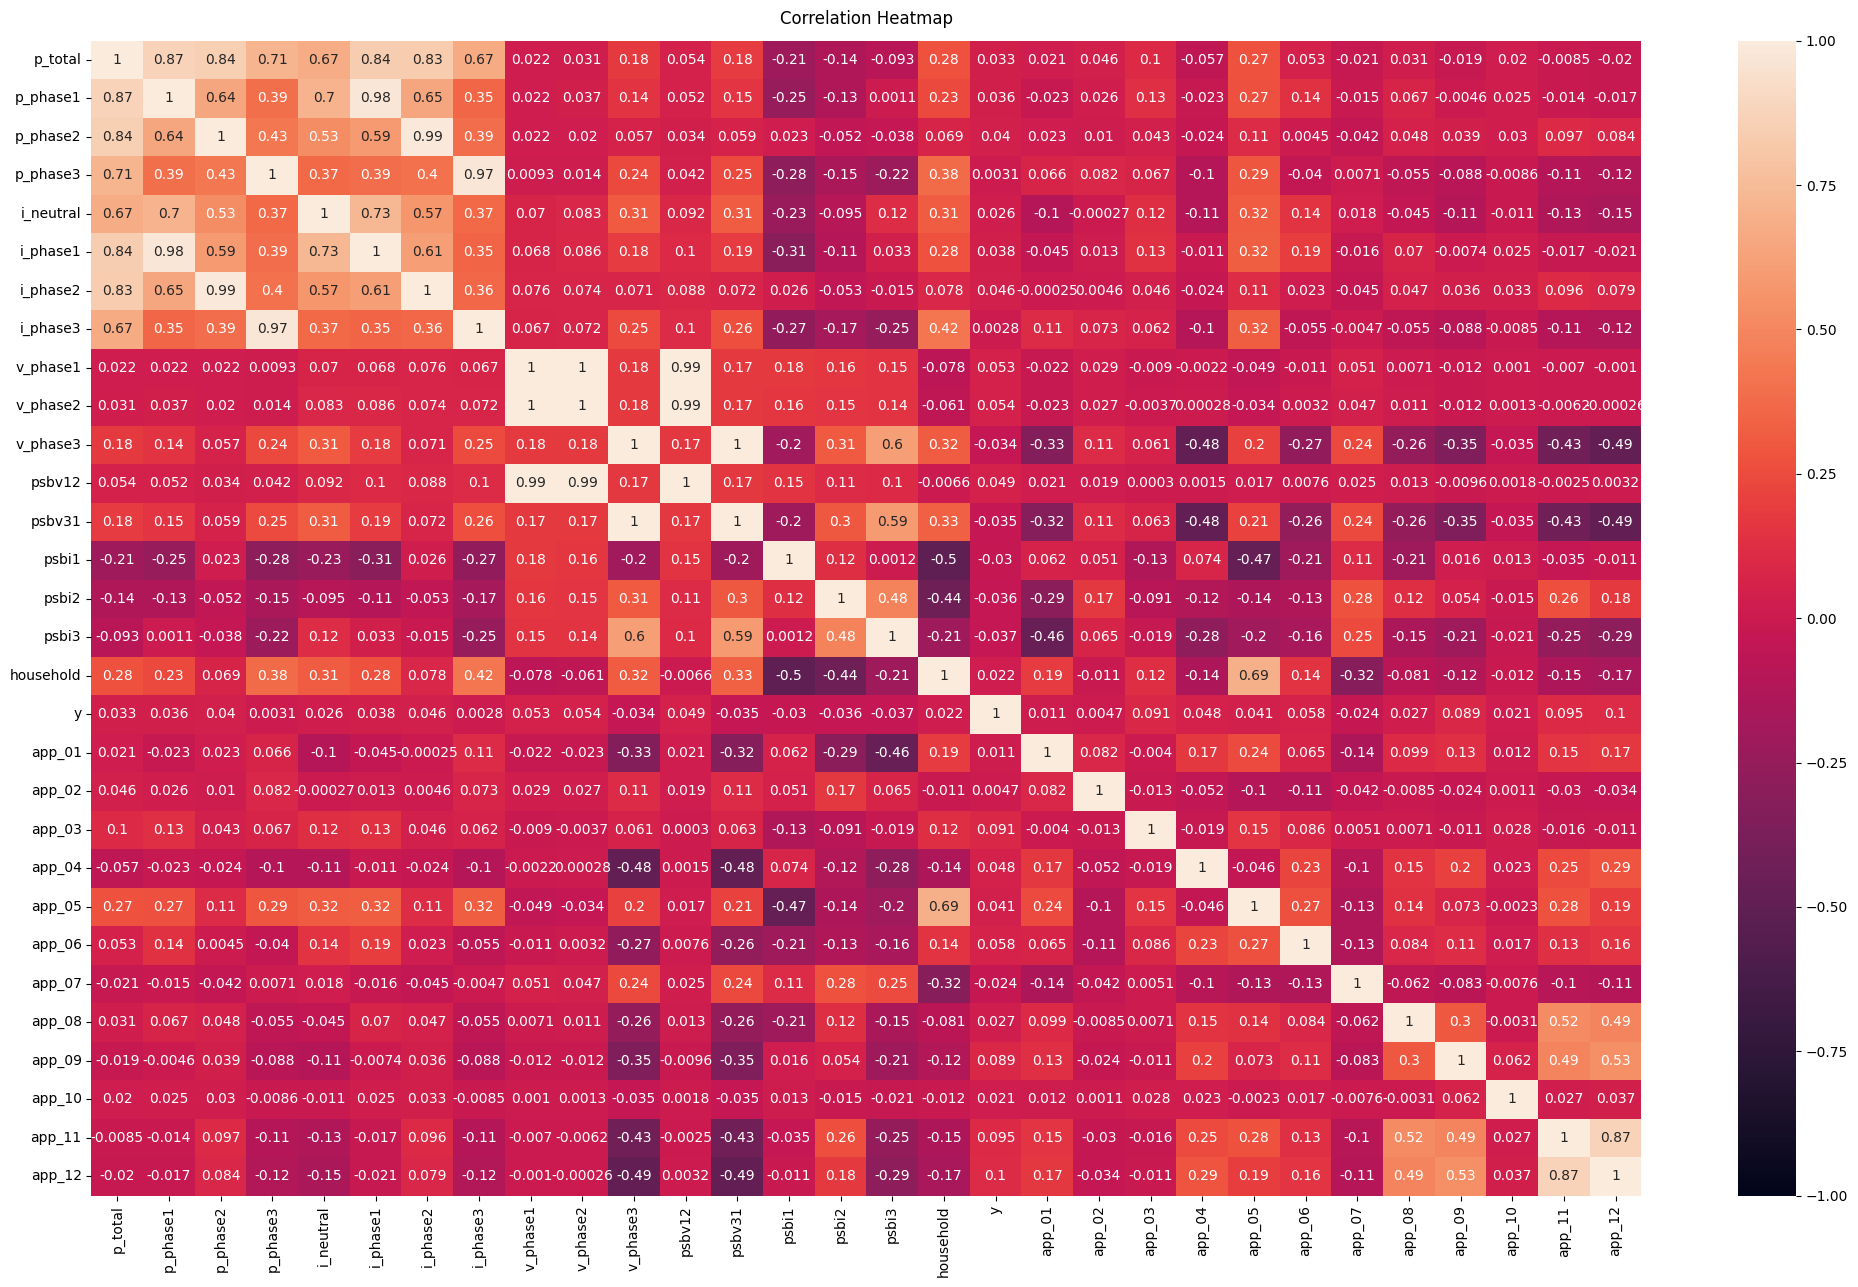

In [ ]:
plt.figure(figsize=(25, 15))
heatmap = splt.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#Split the training/test datasets in the 70/30 % ratio
x= df.drop('y',axis=1)
y= df.y

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size= 0.3,shuffle= True,random_state= 0)


In [ ]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([701168, 368320]))

In [ ]:
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [ ]:
scaler= StandardScaler().fit(x_train) 
normalized_x_train= scaler.transform(x_train) 
normalized_x_test= scaler.transform(x_test)
normalized_df= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= df.columns)
normalized_df.describe().applymap(lambda x: f"{x:0.2f}")

,p_total,p_phase1,p_phase2,p_phase3,i_neutral,i_phase1,i_phase2,i_phase3,v_phase1,v_phase2,...,app_03,app_04,app_05,app_06,app_07,app_08,app_09,app_10,app_11,app_12
count,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,...,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.34
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,-0.57,-0.56,-0.37,-0.45,-0.98,-1.08,-0.94,-1.11,-10.62,-10.63,...,-0.34,-0.86,-0.64,-0.44,-0.16,-0.20,-0.02,-0.24,-0.27,0.00
25%,-0.46,-0.44,-0.31,-0.45,-0.55,-0.57,-0.29,-0.44,-0.01,0.03,...,-0.34,-0.86,-0.64,-0.44,-0.16,-0.20,-0.02,-0.24,-0.27,0.00
50%,-0.28,-0.34,-0.28,-0.41,-0.55,-0.06,-0.29,-0.44,0.08,0.07,...,-0.34,-0.86,-0.64,-0.44,-0.16,-0.20,-0.02,-0.24,-0.27,0.00
75%,0.02,0.04,-0.13,0.05,0.31,-0.06,-0.29,0.23,0.17,0.17,...,-0.34,1.16,1.57,-0.44,-0.16,-0.20,-0.02,-0.24,-0.27,1.00
max,11.55,10.64,13.77,14.16,10.21,9.70,12.68,12.94,0.49,0.48,...,2.94,1.16,1.57,2.26,6.26,5.07,50.88,4.23,3.70,1.00


In [ ]:
def reports(estimates,mod):
    global y_test
    print("Accuracy of %s: %f"%(mod,((metrics.accuracy_score(y_test, estimates))*100)))
    print("\n\nROC CURVE and AUC \n\n")
    metrics.RocCurveDisplay.from_predictions(y_test,estimates)
    plt.plot([0, 1], ls="--")
    plt.show()
    print('AUC : %f'%metrics.roc_auc_score(y_test, estimates))
    print("\n\n\nClassification Report \n\n",metrics.classification_report(y_test,estimates,target_names=['no','yes']))


Model *1* - **Logistic Regression** **bold text**

Accuracy of Logistic Regression (LR): 67.159301


ROC CURVE and AUC 




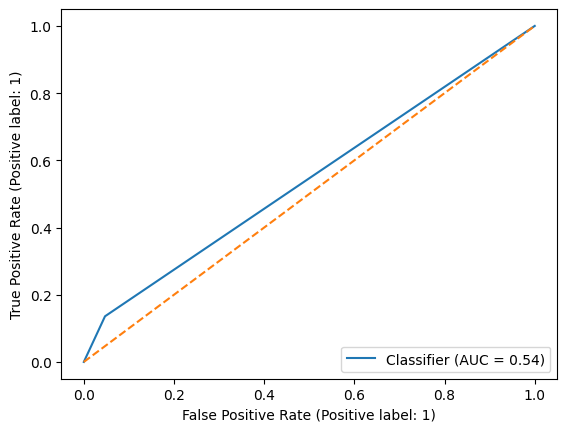

AUC : 0.544409



Classification Report 

               precision    recall  f1-score   support

          no       0.68      0.95      0.79    300512
         yes       0.60      0.14      0.22    157840

    accuracy                           0.67    458352
   macro avg       0.64      0.54      0.51    458352
weighted avg       0.65      0.67      0.60    458352



In [ ]:
mod='Logistic Regression (LR)'
model1 = LogisticRegression(max_iter=1000)
model1=model1.fit(normalized_x_train,y_train)
result1=model1.predict(normalized_x_test)
reports(result1,mod)

In [ ]:
max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}

In [ ]:
random_estimator = RandomizedSearchCV(estimator = model1,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(normalized_x_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', random_estimator.best_params_, ' \n')

In [ ]:
mod='Logistic Regression (LR)'
model1 = LogisticRegression(max_iter=1000)
model1=model1.fit(normalized_x_train,y_train)
result1=model1.predict(normalized_x_test)
reports(result1,mod)

Model *2* - **Decission tree** **bold text**

In [ ]:
mod='Decision Tree'
model2 = DecisionTreeClassifier()
model2=model2.fit(normalized_x_train,y_train)
result2=model2.predict(normalized_x_test)
reports(result2,mod)

In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)


In [ ]:

tree_cv=tree_cv.fit(normalized_x_train,y_train)

In [ ]:
print ('Random grid: ', param_dist, '\n')
# print the best parameters
print ('Best Parameters: ', tree_cv.best_params_, ' \n')

In [ ]:
mod='Decision Tree'
model2 = DecisionTreeClassifier()
model2=model2.fit(normalized_x_train,y_train)
result2=model2.predict(normalized_x_test)
reports(result2,mod)

Model *3* - **Random Forest** **bold text**

In [ ]:
mod='Random Forest'
model3 = RandomForestClassifier()
model3=model3.fit(normalized_x_train,y_train)
result3=model3.predict(normalized_x_test)
reports(result3,mod)

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


In [ ]:

rf_random=rf_random.fit(normalized_x_train,y_train)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [ ]:
mod='Random Forest'
model3 = RandomForestClassifier()
model3=model3.fit(normalized_x_train,y_train)
result3=model3.predict(normalized_x_test)
reports(result3,mod)

Model *4* - XGBoost Algorithm (XGB)

In [ ]:
mod='- XGBoost Algorithm (XGB)'
model4 = XGBClassifier()
model4=model4.fit(normalized_x_train,y_train)
result4=model4.predict(normalized_x_test)
reports(result4,mod)

In [ ]:
params = {
 “learning_rate” : [0.05,0.10,0.15,0.20,0.25,0.30],
 “max_depth” : [ 3, 4, 5, 6, 8, 10, 12, 15],
 “min_child_weight” : [ 1, 3, 5, 7 ],
 “gamma”: [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 “colsample_bytree” : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
classifier = xgboost.XGBClassifier()
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(normalized_x_train,y_train)

In [ ]:
print ('Random grid: ', params, '\n')
# print the best parameters
print ('Best Parameters: ', rs_model.best_params_, ' \n')

In [ ]:
mod='- XGBoost Algorithm (XGB)'
model4 = XGBClassifier()
model4=model4.fit(normalized_x_train,y_train)
result4=model4.predict(normalized_x_test)
reports(result4,mod)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

mod="Neural Network"
# Define the binary classification model
model5 = Sequential()
# Add the input layer with input_dim equal to the number of features in your data
model5.add(Dense(units=64, activation='relu', input_dim=x.shape[1]))
# Add a hidden layer with 32 units and 'relu' activation
model5.add(Dense(units=32, activation='relu'))
# Add the output layer with 1 unit (for binary classification) and 'sigmoid' activation
model5.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on your data
model5.fit(normalized_x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on your test data
loss, accuracy = model5.evaluate(normalized_x_test, y_test)

# Make predictions using the trained model
result5 = model5.predict(normalized_x_test)
reports(result5.round(),mod)

Epoch 1/10
33422/33422 [==============================] - 72s 2ms/step - loss: 0.5725 - accuracy: 0.7045
Epoch 2/10
33422/33422 [==============================] - 69s 2ms/step - loss: 0.5452 - accuracy: 0.7223
Epoch 3/10
33422/33422 [==============================] - 69s 2ms/step - loss: 0.5358 - accuracy: 0.7290
Epoch 4/10
33422/33422 [==============================] - 68s 2ms/step - loss: 0.5301 - accuracy: 0.7330
Epoch 5/10
33422/33422 [==============================] - 67s 2ms/step - loss: 0.5264 - accuracy: 0.7357
Epoch 6/10
33422/33422 [==============================] - 69s 2ms/step - loss: 0.5236 - accuracy: 0.7372
Epoch 7/10
33422/33422 [==============================] - 67s 2ms/step - loss: 0.5208 - accuracy: 0.7393
Epoch 8/10
33422/33422 [==============================] - 68s 2ms/step - loss: 0.5188 - accuracy: 0.7406
Epoch 9/10
33422/33422 [==============================] - 68s 2ms/step - loss: 0.5167 - accuracy: 0.7418
Epoch 10/10
14324/14324 [==============================

NameError: ignored

Accuracy of Neural Network: 74.199087


ROC CURVE and AUC 




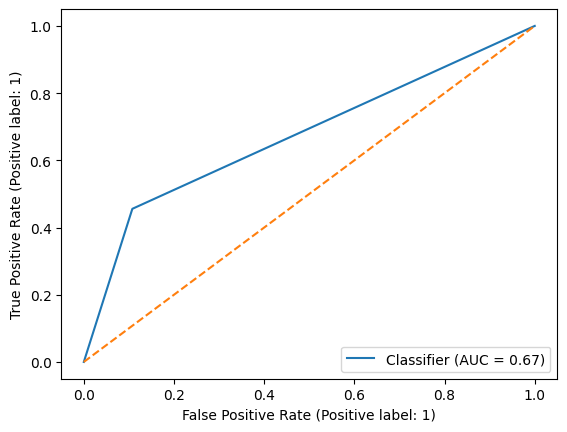

AUC : 0.674022



Classification Report 

               precision    recall  f1-score   support

          no       0.76      0.89      0.82    300512
         yes       0.69      0.46      0.55    157840

    accuracy                           0.74    458352
   macro avg       0.72      0.67      0.68    458352
weighted avg       0.73      0.74      0.73    458352



In [ ]:
reports(result.round(),mod)

ADDING column Holiday

In [ ]:
!ls drive/MyDrive/Capstone/Dataset

01_doc.txt	      03_plugs_matlab.zip   06_doc.txt
01_occupancy_csv.zip  03_sm_csv.zip	    06_plugs_csv.zip
01_plugs_csv.zip      03_sm_matlab.zip	    06_plugs_matlab.zip
01_plugs_matlab.zip   04_doc.txt	    06_sm_csv.zip
01_sm_csv.zip	      04_occupancy_csv.zip  06_sm_matlab.zip
01_sm_matlab.zip      04_plugs_csv.zip	    cleaned_data
02_doc.txt	      04_plugs_matlab.zip   cleaned_data_1m
02_occupancy_csv.zip  04_sm_csv.zip	    cleaned_data_1m.csv
02_plugs_csv.zip      04_sm_matlab.zip	    cleaned_data.csv
02_plugs_matlab.zip   05_doc.txt	    plug_oc_cleaned.csv
02_sm_csv.zip	      05_occupancy_csv.zip  public_holiday.csv
02_sm_matlab.zip      05_plugs_csv.zip	    READ_ME_FIRST.txt
03_doc.txt	      05_plugs_matlab.zip   sm_oc_cleaned.csv
03_occupancy_csv.zip  05_sm_csv.zip
03_plugs_csv.zip      05_sm_matlab.zip


In [ ]:
df_holiday=pd.merge(tmp, tmp2, on=['Datetime','household'],how='right')
df_holiday['Datetime'] = pd.to_datetime(df_holiday['Datetime'])
public=pd.read_csv('drive/MyDrive/Capstone/Dataset/public_holiday.csv',header=None,names=['date','event'])
public.drop('event', axis=1,inplace=True)
public['date'] = pd.to_datetime(public['date'])
df_holiday['holiday']=0
#df_holiday.set_index('Datetime',inplace=True)

In [ ]:
t_delta=pd.timedelta_range(start='0 day', end='1 days', freq='1s')[:-1]

In [ ]:
for i in public.date:
  index=df_holiday[df_holiday.Datetime.isin(pd.to_datetime(i)+t_delta)].index
  df_holiday.loc[index,'holiday']=1

In [ ]:
df_holiday[df_holiday.holiday==1]

,Datetime,p_total,p_phase1,p_phase2,p_phase3,i_neutral,i_phase1,i_phase2,i_phase3,v_phase1,...,app_04,app_05,app_06,app_07,app_08,app_09,app_10,app_11,app_12,holiday
87840,2012-08-01 00:00:00,90.0,60.0,19.0,11.0,0.0,0.0,0.0,0.0,240.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
87841,2012-08-01 00:01:00,115.0,84.0,19.0,11.0,0.0,0.0,0.0,0.0,237.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
87842,2012-08-01 00:02:00,55.0,25.0,19.0,11.0,0.0,0.0,0.0,0.0,237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
87843,2012-08-01 00:03:00,55.0,25.0,19.0,11.0,0.0,0.0,0.0,0.0,237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
87844,2012-08-01 00:04:00,86.0,56.0,19.0,11.0,0.0,0.0,0.0,0.0,238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645915,2012-09-16 23:55:00,66.0,11.0,21.0,34.0,0.0,0.0,0.0,0.0,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1645916,2012-09-16 23:56:00,66.0,11.0,21.0,34.0,0.0,0.0,0.0,0.0,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1645917,2012-09-16 23:57:00,66.0,11.0,21.0,34.0,0.0,0.0,0.0,0.0,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1645918,2012-09-16 23:58:00,66.0,11.0,21.0,34.0,0.0,0.0,0.0,0.0,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df_holiday.set_index('Datetime',inplace=True)

In [ ]:
# as the oc data of this house hold in not give hence considering it as unlabelled data
test_unlabel=df_holiday[df_holiday.household==6]

In [ ]:
#
df_holiday=df_holiday[df_holiday.household!=6].drop('occ_tablet_y',axis=1).rename({'occ_tablet_x':'y'},axis=1)

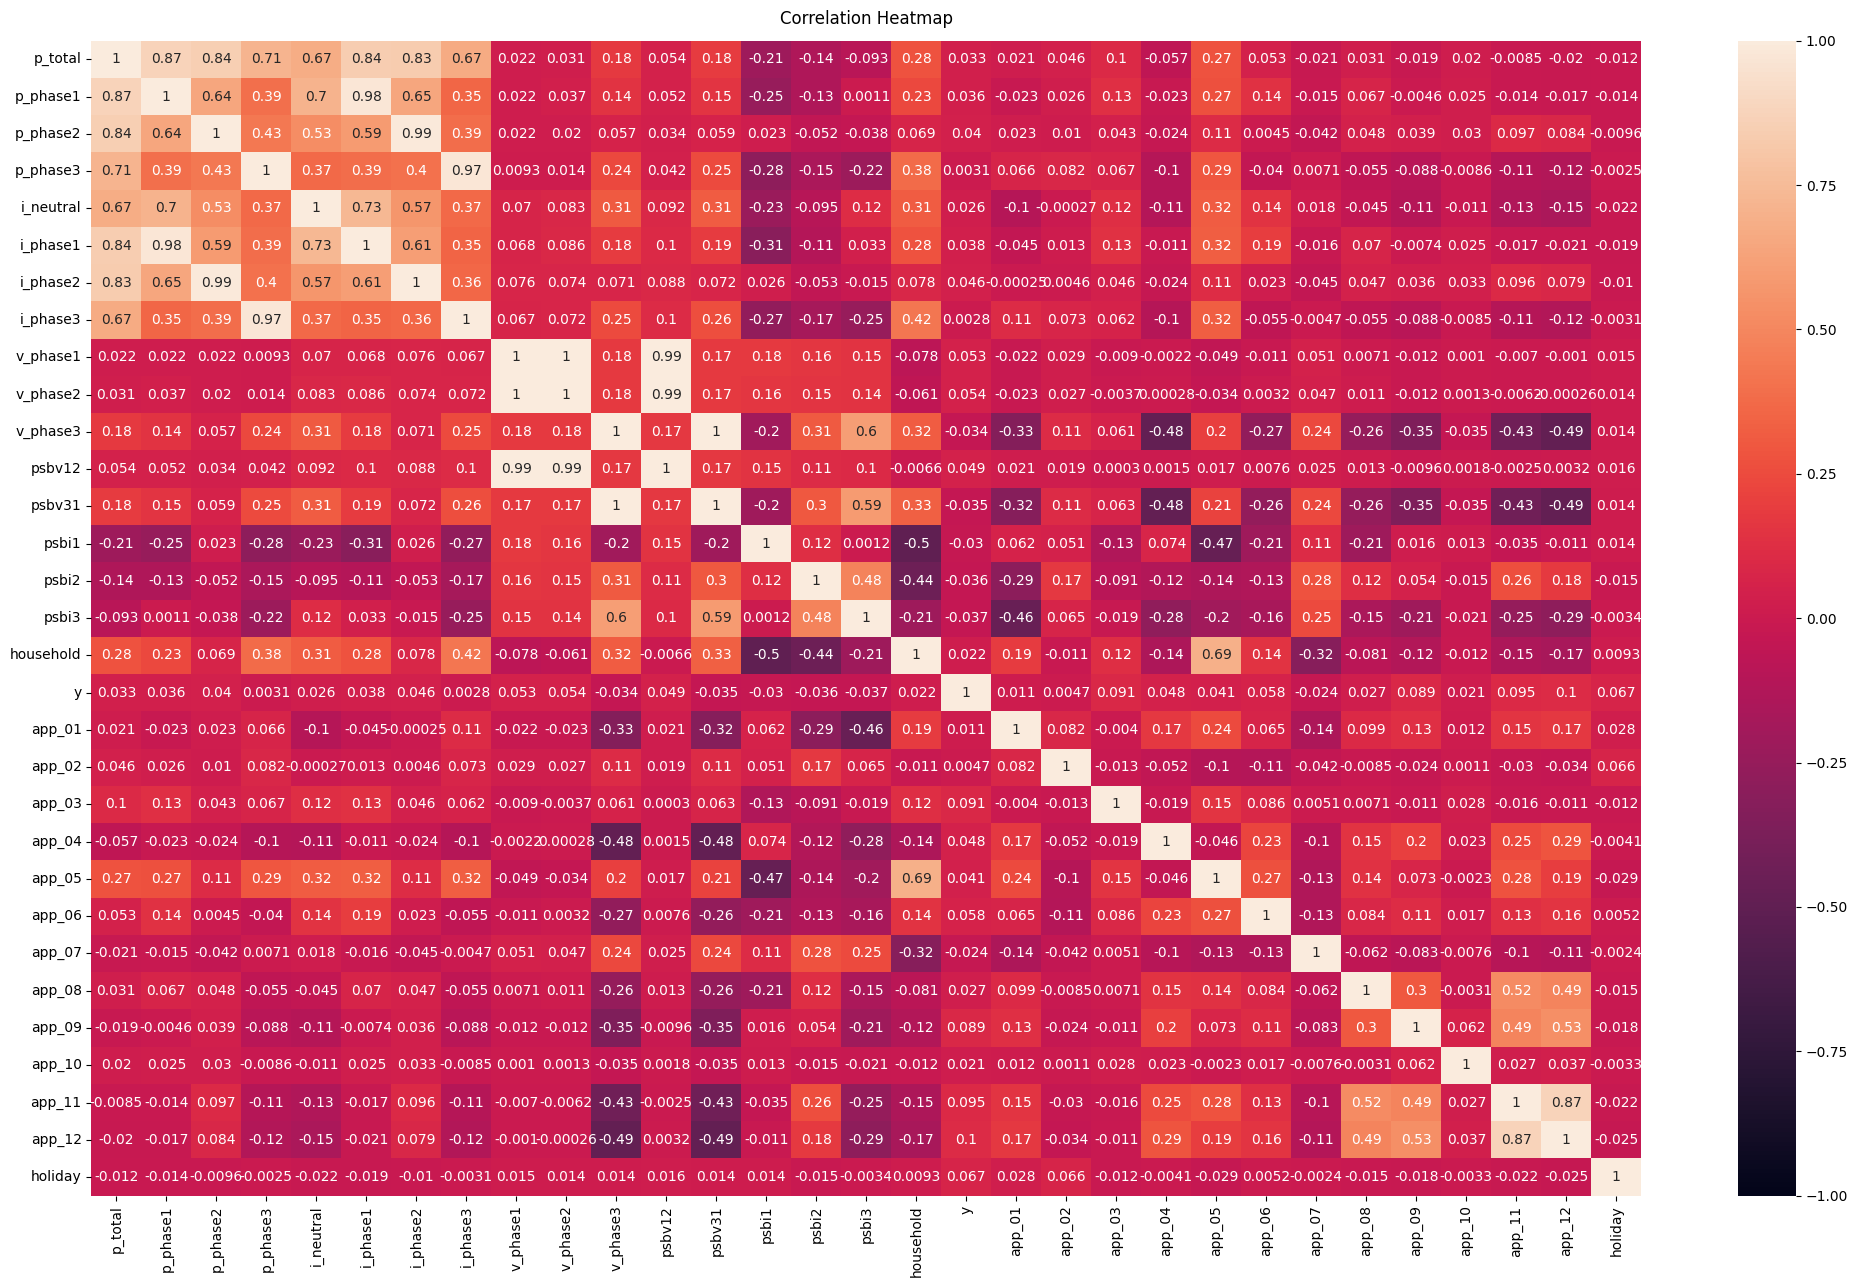

In [ ]:
plt.figure(figsize=(25, 15))
heatmap = splt.heatmap(df_holiday.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#Split the training/test datasets in the 70/30 % ratio
x= df_holiday.drop('y',axis=1)
y= df_holiday.y

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size= 0.3,shuffle= True,random_state= 0)


In [ ]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([701168, 368320]))

In [ ]:
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [ ]:
scaler= StandardScaler().fit(x_train) 
normalized_x_train= scaler.transform(x_train) 
normalized_x_test= scaler.transform(x_test)
normalized_df= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= df_holiday.columns)
normalized_df.describe().applymap(lambda x: f"{x:0.2f}")

,p_total,p_phase1,p_phase2,p_phase3,i_neutral,i_phase1,i_phase2,i_phase3,v_phase1,v_phase2,...,app_04,app_05,app_06,app_07,app_08,app_09,app_10,app_11,app_12,holiday
count,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,...,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00,1069488.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.34
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,-0.57,-0.56,-0.37,-0.45,-0.98,-1.08,-0.94,-1.11,-10.62,-10.63,...,-0.86,-0.64,-0.44,-0.16,-0.20,-0.02,-0.24,-0.27,-0.17,0.00
25%,-0.46,-0.44,-0.31,-0.45,-0.55,-0.57,-0.29,-0.44,-0.01,0.03,...,-0.86,-0.64,-0.44,-0.16,-0.20,-0.02,-0.24,-0.27,-0.17,0.00
50%,-0.28,-0.34,-0.28,-0.41,-0.55,-0.06,-0.29,-0.44,0.08,0.07,...,-0.86,-0.64,-0.44,-0.16,-0.20,-0.02,-0.24,-0.27,-0.17,0.00
75%,0.02,0.04,-0.13,0.05,0.31,-0.06,-0.29,0.23,0.17,0.17,...,1.16,1.57,-0.44,-0.16,-0.20,-0.02,-0.24,-0.27,-0.17,1.00
max,11.55,10.64,13.77,14.16,10.21,9.70,12.68,12.94,0.49,0.48,...,1.16,1.57,2.26,6.26,5.07,50.88,4.23,3.70,5.86,1.00


In [ ]:
def reports(estimates,mod):
    global y_test
    print("Accuracy of %s: %f"%(mod,((metrics.accuracy_score(y_test, estimates))*100)))
    print("\n\nROC CURVE and AUC \n\n")
    metrics.RocCurveDisplay.from_predictions(y_test,estimates)
    plt.plot([0, 1], ls="--")
    plt.show()
    print('AUC : %f'%metrics.roc_auc_score(y_test, estimates))
    print("\n\n\nClassification Report \n\n",metrics.classification_report(y_test,estimates,target_names=['no','yes']))


Model *1* - **Logistic Regression** **bold text**

Accuracy of Logistic Regression (LR): 67.187664


ROC CURVE and AUC 




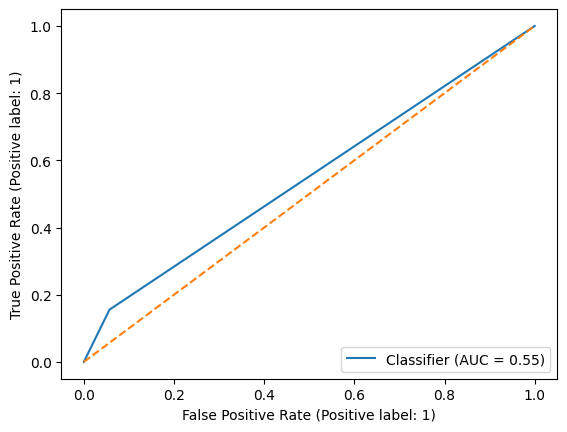

AUC : 0.549309



Classification Report 

               precision    recall  f1-score   support

          no       0.68      0.94      0.79    300512
         yes       0.59      0.16      0.25    157840

    accuracy                           0.67    458352
   macro avg       0.63      0.55      0.52    458352
weighted avg       0.65      0.67      0.60    458352



In [ ]:
mod='Logistic Regression (LR)'
model1 = LogisticRegression(max_iter=1000)
model1=model1.fit(normalized_x_train,y_train)
result1=model1.predict(normalized_x_test)
reports(result1,mod)

Model *2* - **Decission tree** **bold text**

Accuracy of Decision Tree: 87.105980


ROC CURVE and AUC 




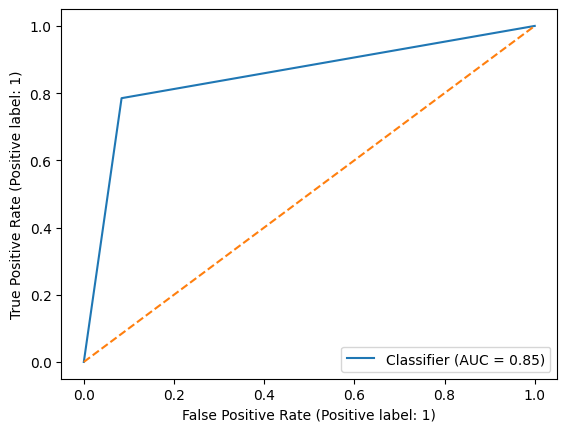

AUC : 0.850627



Classification Report 

               precision    recall  f1-score   support

          no       0.89      0.92      0.90    300512
         yes       0.83      0.78      0.81    157840

    accuracy                           0.87    458352
   macro avg       0.86      0.85      0.86    458352
weighted avg       0.87      0.87      0.87    458352



In [ ]:
mod='Decision Tree'
model2 = DecisionTreeClassifier()
model2=model2.fit(normalized_x_train,y_train)
result2=model2.predict(normalized_x_test)
reports(result2,mod)

Model *3* - **Random Forest** **bold text**

Accuracy of Random Forest: 89.656421


ROC CURVE and AUC 




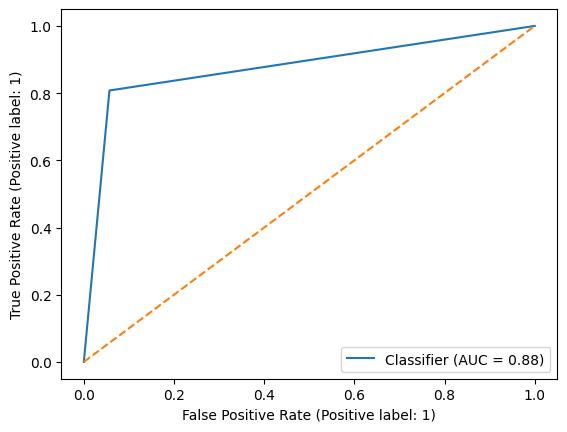

AUC : 0.875505



Classification Report 

               precision    recall  f1-score   support

          no       0.90      0.94      0.92    300512
         yes       0.88      0.81      0.84    157840

    accuracy                           0.90    458352
   macro avg       0.89      0.88      0.88    458352
weighted avg       0.90      0.90      0.90    458352



In [ ]:
mod='Random Forest'
model3 = RandomForestClassifier()
model3=model3.fit(normalized_x_train,y_train)
result3=model3.predict(normalized_x_test)
reports(result3,mod)

Model *4* - XGBoost Algorithm (XGB)

Accuracy of - XGBoost Algorithm (XGB): 80.194479


ROC CURVE and AUC 




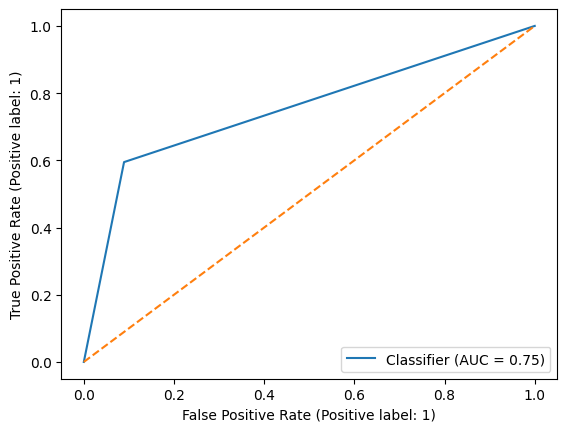

AUC : 0.752754



Classification Report 

               precision    recall  f1-score   support

          no       0.81      0.91      0.86    300512
         yes       0.78      0.59      0.67    157840

    accuracy                           0.80    458352
   macro avg       0.79      0.75      0.77    458352
weighted avg       0.80      0.80      0.79    458352



In [ ]:
mod='- XGBoost Algorithm (XGB)'
model4 = XGBClassifier()
model4=model4.fit(normalized_x_train,y_train)
result4=model4.predict(normalized_x_test)
reports(result4,mod)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

mod="Neural Network"
# Define the binary classification model
model5 = Sequential()
# Add the input layer with input_dim equal to the number of features in your data
model5.add(Dense(units=64, activation='relu', input_dim=x.shape[1]))
# Add a hidden layer with 32 units and 'relu' activation
model5.add(Dense(units=32, activation='relu'))
# Add the output layer with 1 unit (for binary classification) and 'sigmoid' activation
model5.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on your data
model5.fit(normalized_x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on your test data
loss, accuracy = model5.evaluate(normalized_x_test, y_test)

# Make predictions using the trained model
result5 = model5.predict(normalized_x_test)
reports(result5.round(),mod)

Epoch 1/10
33422/33422 [==============================] - 73s 2ms/step - loss: 0.5695 - accuracy: 0.7075
Epoch 2/10
33422/33422 [==============================] - 69s 2ms/step - loss: 0.5421 - accuracy: 0.7238
Epoch 3/10
33422/33422 [==============================] - 66s 2ms/step - loss: 0.5315 - accuracy: 0.7313
Epoch 4/10
33422/33422 [==============================] - 65s 2ms/step - loss: 0.5255 - accuracy: 0.7353
Epoch 5/10
33422/33422 [==============================] - 66s 2ms/step - loss: 0.5215 - accuracy: 0.7379
Epoch 6/10
33422/33422 [==============================] - 67s 2ms/step - loss: 0.5181 - accuracy: 0.7399
Epoch 7/10
33422/33422 [==============================] - 66s 2ms/step - loss: 0.5159 - accuracy: 0.7412
Epoch 8/10
33422/33422 [==============================] - 66s 2ms/step - loss: 0.5140 - accuracy: 0.7422
Epoch 9/10
33422/33422 [==============================] - 72s 2ms/step - loss: 0.5119 - accuracy: 0.7434
Epoch 10/10
14324/14324 [==============================

ValueError: ignored

Accuracy of Neural Network: 74.635869


ROC CURVE and AUC 




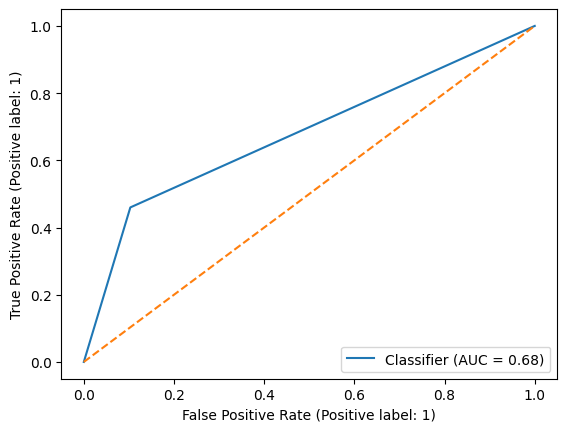

AUC : 0.678343



Classification Report 

               precision    recall  f1-score   support

          no       0.76      0.90      0.82    300512
         yes       0.70      0.46      0.56    157840

    accuracy                           0.75    458352
   macro avg       0.73      0.68      0.69    458352
weighted avg       0.74      0.75      0.73    458352



In [ ]:
reports(result5.round(),mod)